### 折线图

这里使用`nupmy`获取了200个连续的点，所以看起来像曲线图一样；如果将横坐标的点的数目减少的话，可以看到变成了折线图
> `plot`函数第一个参数指定X轴数据，第二个参数指定y轴数据<br />
`subplot`函数可以在一个figure中绘制多个小图，参数指定小图的网格分布，例如 `subplot(2,2)`表示四张图片占据两行，两列

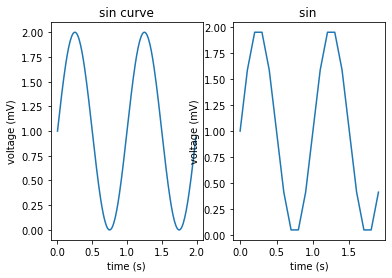

In [85]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t1 = np.arange(0.0, 2.0, 0.01)
s1 = 1 + np.sin(2 * np.pi * t1)

t2 = np.arange(0.0, 2.0, 0.1)
s2 = 1 + np.sin(2 * np.pi * t2)
fig, ax = plt.subplots(1,2) ##声明一个一行两列的图
ax[0].plot(t1, s1)   ##第一个subplot绘制

ax[0].set(xlabel='time (s)', ylabel='voltage (mV)',
       title='sin curve')  ##设置坐标轴title和图片title

ax[1].plot(t2, s2)   ##第二个subplot绘制

ax[1].set(xlabel='time (s)', ylabel='voltage (mV)',
       title='sin ')
#fig.savefig("test.png")
plt.show()

### pcolormesh网格热图

> 首先来解释一下啥叫网格热图，在matplotlib中x、y轴上的信息表示的是网格上的一个个交点；在`pcolormesh`函数中x、y的交点坐标构成的格子根据对应的`z`值来映射出不同的颜色；从下图中也可以看出X轴上和
 <br/>参考： https://blog.csdn.net/lllxxq141592654/article/details/81532855
 

在Z值的控制下将颜色映射到格子上，这里使用`np.rand(6,10)`获得了一个7X11的二维矩阵


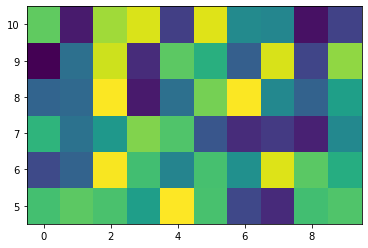

In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(19680801)
Z = np.random.rand(6, 10)  ##获取一个7行11列的二维矩阵
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)


#### 倾斜的网格热图

前面说到图形的定位是通过网格点来进行的，网格点的坐标就构成了坐标矩阵，描述了网格点所在的位置;

例如一个3X3的网格，里面就包含了9个坐标点，对应的坐标矩阵如下

> 坐标矩阵的格式：X轴坐标矩阵是一个二维矩阵，列向量表示同一行中点的X轴坐标；Y坐标矩阵类似

```python
  X:  [[1 2 3]
     [1 2 3]
     [1 2 3]]
  Y:  [[1 1 1]
     [2 2 2]
     [3 3 3]]

```

知道了坐标矩阵的原理后，只需要利用`numpy.meshgrid`获取对应的坐标矩阵就可以通过修改里面的值来倾斜图形了

[[1.2 2.2 3.2]
 [1.4 2.4 3.4]
 [1.6 2.6 3.6]]
[[1.36 1.66 1.96]
 [2.42 2.72 3.02]
 [3.48 3.78 4.08]]


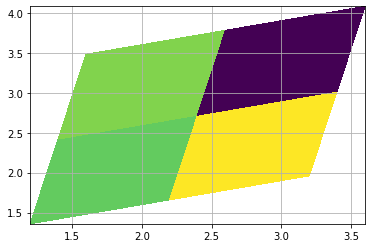

In [59]:
x=np.arange(1,4,1)
y=np.arange(1,4,1)
fig, ax = plt.subplots()
X, Y = np.meshgrid(x, y) ##获得对应点的坐标矩阵
X = X + 0.2 * Y  # tilt the coordinates.
Y = Y + 0.3 * X
print(X)
print(Y)
np.random.seed(19680801)
Z=np.random.rand(2, 2)
ax.pcolormesh(X, Y, Z)
ax.grid(True)

### 对数据进行归一化

根据Z值的大小范围，将Z值分成20个区间，每个区间映射上不同的颜色，表示Z值的大小

+ ` BoundaryNorm`函数中设置颜色映射范围，以及要映射的颜色的总数，`clip`指定超出范围的值的颜色映射值

256


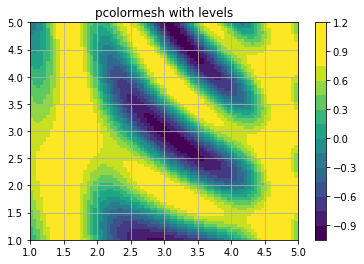

In [86]:
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

##生成坐标矩阵
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]
z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# 生成颜色映射值
z = z[:-1, :-1]  
##图例的范围及图例跨度设置
levels = MaxNLocator(nbins=20).tick_values(z.min(), z.max())
print(cmap.N)

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap()  ##设置颜色方案为默认的
norm = BoundaryNorm(levels, ncolors=300,clip=True) ##颜色映射


fig, ax0 = plt.subplots()

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')
ax0.grid(True)


### 直方图

> `hist`函数输入的数据包含：
  + 柱子高度
  + 柱子的个数

默认情况下`hist`函数绘制的是频数直方图，统计每个范围的柱子的个数，如果要计算频率分布直方图只需要加上`density=True`即可



Text(0.5, 1.0, 'Frequent')

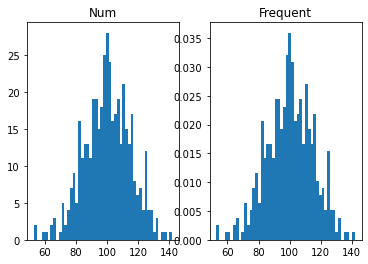

In [99]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, (ax0,ax1) = plt.subplots(ncols=2)

# the histogram of the data
n, bins, patches = ax0.hist(x, num_bins)  ##频数直方图
ax0.set_title("Num")
n, bins, patches = ax1.hist(x, num_bins,density=True) ##频率直方图
ax1.set_title("Frequent")